## Import Necessary Libraries

In [68]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import numpy as np

In [69]:
X, y = make_regression(n_samples=1000, n_features=1, noise=10, random_state=42)

# Reshape y to (1000, 1)
y = y.reshape(-1, 1)
print('Features:\n', X[:5])
print('\n Traget:\n', y[:5])

Features:
 [[-1.75873949]
 [ 1.03184454]
 [-0.48760622]
 [ 0.18645431]
 [ 0.72576662]]

 Traget:
 [[-32.77038605]
 [  3.50459106]
 [-17.93030767]
 [ -3.99020124]
 [ 13.10526434]]


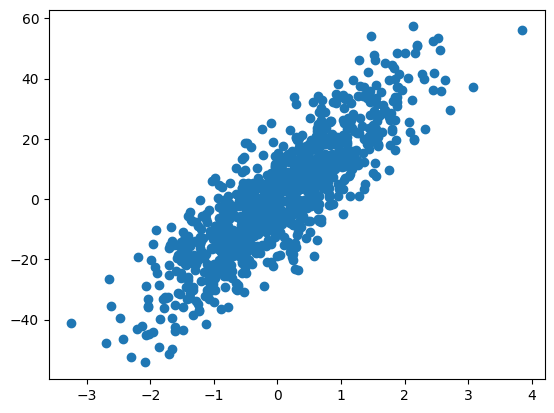

In [70]:
plt.scatter(X,y)
plt.show()

In [71]:
# Convert to tensors
X_tensor = torch.from_numpy(X).float()
y_tensor = torch.from_numpy(y).float()
# Create dataset
dataset = TensorDataset(X_tensor, y_tensor)
# Create DataLoader
loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [78]:
model = nn.Linear(in_features=1, out_features=1)
criterion = nn.MSELoss()
n_epochs = 2000
lr = 0.1
errors = []
for epoch in range(n_epochs):
    for X_batch, y_batch in loader:
        y_pred = model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        with torch.no_grad():
            for param in model.parameters():
                param -= lr*param.grad
        model.zero_grad()
    if epoch % 10 == 0:
      errors.append((epoch, loss.item()))

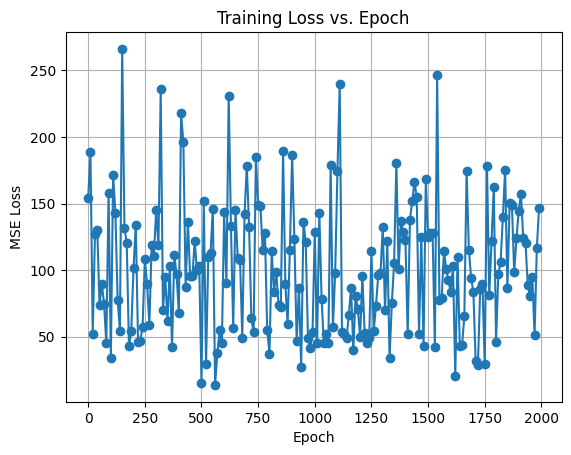

In [73]:
import matplotlib.pyplot as plt

# unpack the (epoch, loss) pairs
epochs, losses = zip(*errors)          # errors = [(epoch0, loss0), (epoch10, loss10), …]

plt.plot(epochs, losses, marker='o')
plt.title("Training Loss vs. Epoch")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

In [74]:
print(model.weight.data)
print(model.bias.data)

tensor([[16.5897]])
tensor([-0.0424])


### Using ScikitLearn Library

In [76]:
from sklearn.linear_model import LinearRegression
sk_model = LinearRegression()
sk_model.fit(X,y)
print(sk_model.coef_)
print(sk_model.intercept_)

[[16.63354605]]
[0.04526206]


### Evaluating The Score Using $R^2$ Score

In [77]:
# PyTorch prediction
with torch.no_grad():
    y_pred_pytorch = model(X_tensor)

# sklearn prediction
y_pred_sklearn = sk_model.predict(X)

from sklearn.metrics import r2_score

score_pytorch = r2_score(y, y_pred_pytorch.numpy())
score_sklearn = r2_score(y, y_pred_sklearn)

print(f"R² Score (PyTorch):  {score_pytorch:.4f}")
print(f"R² Score (sklearn):  {score_sklearn:.4f}")

R² Score (PyTorch):  0.7300
R² Score (sklearn):  0.7300
